 #  **Project: Big Data Approaches to Understanding Mental Health Trends via Social Media**

# Exploratory Data Analysis

## By: Iloka David
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


# Dataset: Social Media and Depression Survey

## Description
This dataset collects responses from a structured survey aimed at understanding how social media usage correlates with signs of depressive symptoms, restlessness, self-comparison, and concentration issues among young adults. The study was conducted via online forms with over 100 respondents, most of whom are students and young professionals in Nigeria.

---

## Columns Description

| Column | Description |
|--------|-------------|
| **Age** | Respondent's age in years |
| **Gender** | Respondent's gender (Male/Female/Other) |
| **Relationship Status** | Single, In a relationship, Married, etc. |
| **Occupation Status** | Employment type (e.g., Student, Employed, Unemployed) |
| **Affiliated Organizations** | Type of institutions the respondent is affiliated with (e.g., University) |
| **Do you use social media?** | Yes/No |
| **Commonly used social media platforms** | Platforms frequently used by the respondent (e.g., Instagram, TikTok, etc.) |
| **Average time spent daily on social media** | Ranges (e.g., “Between 2 and 3 hours”, “More than 5 hours”) |
| **Use without purpose** | Scale (1–5) showing frequency of unconscious or idle usage |
| **Distraction while busy** | Scale (1–5) showing how often social media distracts the user during important tasks |
| **Restlessness without social media** | Scale (1–5) reflecting discomfort when not using social media |
| **Easily distracted** | Scale (1–5) on attention span generally |
| **Bothered by worries** | Scale (1–5) reflecting how often they feel overwhelmed by worries |
| **Difficulty concentrating** | Scale (1–5) indicating how often they lose focus |
| **Social comparison frequency** | Scale (1–5) on how often they compare themselves to others online |
| **Feelings about social comparison** | Scale (1–5) on emotional response to comparison |
| **Validation-seeking** | Scale (1–5) on how often they seek likes, comments, or approval online |
| **Feeling depressed or down** | Scale (1–5), a proxy for depressive symptoms |
| **Interest in daily activities fluctuating** | Scale (1–5) on motivational consistency |
| **Sleep issues** | Scale (1–5) on frequency of poor sleep or sleep disturbance |



## Research Objective
The key aim is to uncover patterns and predictors that signal increased likelihood of depression based on how individuals engage with social media.



## Research Areas

### 1. Target Variable (Depression Score)
We treat the variable **“How often do you feel depressed or down?”** as the target, ranging from 1 (rarely) to 5 (very often). Understanding its distribution provides insight into baseline mental health in the sample.

### 2. Univariate Analysis
- **Age and Depression**: Do younger users report higher depression scores?
- **Gender Differences**: Are females or males more likely to report depressive symptoms?
- **Time Spent Online**: Does more screen time correlate with higher depression?
- **Validation and Comparison**: How do these behaviors individually relate to feeling depressed?

### 3. Multivariate Analysis
- **Combined Effects**: How do comparison frequency, validation-seeking, and social media time jointly affect depression scores?
- **Correlation Matrix**: Explore relationships among distraction, restlessness, worries, concentration difficulty, and depression.
- **Interaction Effects**: E.g., Does being single + high screen time + frequent comparison significantly increase risk?




## Limitations
- **Self-reported Data**: Responses are subjective and prone to bias or underreporting.
- **Cross-sectional**: Data is from a single point in time and cannot establish causality.
- **Lack of Clinical Diagnosis**: Depression levels are not clinically verified; interpretation must be cautious.
- **Platform Influence Not Disaggregated**: Although users listed multiple platforms, we do not isolate platform-specific effects.
- **Cultural/Regional Limitation**: Surveyed population is localized, mostly students in UK, limiting generalizability.


<a id='intro'></a>
## Section I: Introduction


In [1]:
#Importing all the required libraries and includin a 'magic word' so that visualizations are plotted
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#set seaborn theme for plots:
sns.set_style("darkgrid")

In [2]:
!gdown --id 18lVWcIADftPsPRe5dkAIQXkCPk8pVFO2

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18lVWcIADftPsPRe5dkAIQXkCPk8pVFO2
To: /content/extended_social_media_and_mental_health.csv
100% 399k/399k [00:00<00:00, 109MB/s]


In [5]:

df = pd.read_csv('/content/extended_social_media_and_mental_health.csv')
df.drop('Timestamp', axis=1, inplace=True)

In [6]:
df.head()

,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


<a id='wrangling'></a>
## Section II: Data Wrangling
Data wrangling is the process of cleaning and unifying messy and complex data sets for easy access and analysis



### 1. General Properties (Dataset dimensions, columns/ rows/ data types)

In [7]:
#checking for the basic properties of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 20 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   1. What is your age?                                                                                                  3017 non-null   float64
 1   2. Gender                                                                                                             3017 non-null   object 
 2   3. Relationship Status                                                                                                3017 non-null   object 
 3   4. Occupation Status                                                                                                  3017 non-null   object 
 4   5. Wha

In [8]:
df.head()
#checking the first 5 rows

,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


In [9]:
df.tail()
#display the last 5 rows

,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
3012,23.0,Male,Single,University Student,"School, N/A",Yes,Twitter,Between 2 and 3 hours,4,4,4,3,3,1,4,1,3,3,1,3
3013,24.0,Male,Single,University Student,NaN,Yes,Facebook,Between 3 and 4 hours,5,4,3,2,2,5,1,2,1,3,2,1
3014,29.0,Male,Married,Salaried Worker,University,Yes,LinkedIn,Between 3 and 4 hours,2,5,3,3,1,5,5,4,3,3,1,5
3015,24.0,Male,Single,Salaried Worker,University,Yes,Facebook,Between 1 and 2 hours,4,2,1,5,5,4,2,2,3,4,2,4
3016,18.0,Male,Married,University Student,University,Yes,TikTok,Between 3 and 4 hours,3,4,4,1,4,5,1,2,5,4,2,5


In [10]:
df.dtypes
# Checking the data types

,0
1. What is your age?,float64
2. Gender,object
3. Relationship Status,object
4. Occupation Status,object
5. What type of organizations are you affiliated with?,object
6. Do you use social media?,object
7. What social media platforms do you commonly use?,object
8. What is the average time you spend on social media every day?,object
9. How often do you find yourself using Social media without a specific purpose?,int64
10. How often do you get distracted by Social media when you are busy doing something?,int64


In [11]:
df.describe(include='all')
# describing the data using the describw function.

,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
count,3017.000000,3017,3017,3017,2823,3017,3017,3017,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000
unique,NaN,9,4,4,18,2,127,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Female,Single,University Student,University,Yes,Instagram,More than 5 hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1650,1773,1824,1471,3004,439,733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.554756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.056347,3.034471,2.942327,3.052701,3.113026,3.094465,3.000663,2.967849,2.917468,3.899569,3.013590,3.062314
std,5.453724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.383210,1.432201,1.407158,1.399439,1.402733,1.406936,1.430067,1.353584,1.414735,0.955330,1.385368,1.427083
min,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
50%,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
75%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000


Looking at the dataset, we have Quantitative and Categorical Variables and the nature of variables will affect the nature of analysis

The Dataset is not in the best form for analysis as we need to clean it to make it appropraite for analysis. We have to:

Check for missing Values
Duplicates
Data Validation(Checking for unusual data)
Data Cleaning

In [12]:
# Check if there is any missing values

df.isnull().sum()



,0
1. What is your age?,0
2. Gender,0
3. Relationship Status,0
4. Occupation Status,0
5. What type of organizations are you affiliated with?,194
6. Do you use social media?,0
7. What social media platforms do you commonly use?,0
8. What is the average time you spend on social media every day?,0
9. How often do you find yourself using Social media without a specific purpose?,0
10. How often do you get distracted by Social media when you are busy doing something?,0


In [13]:
col_names_dict = {
    'Timestamp': 'timestamp',
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship',
    '4. Occupation Status': 'occupation',
    '5. What type of organizations are you affiliated with?': 'affiliate_organization',
    '6. Do you use social media?': 'social_media_use',
    '7. What social media platforms do you commonly use?': 'platforms',
    '8. What is the average time you spend on social media every day?': 'avg_time_per_day',
    '9. How often do you find yourself using Social media without a specific purpose?': 'without_purpose',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'distracted',
    "11. Do you feel restless if you haven't used Social media in a while?": 'restless',
    '12. On a scale of 1 to 5, how easily distracted are you?' : 'distracted_ease',
    '13. On a scale of 1 to 5, how much are you bothered by worries?' : 'worries',
    '14. Do you find it difficult to concentrate on things?' : 'concentration',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?' : 'compare_to_others',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?' : 'compare_feelings',
    '17. How often do you look to seek validation from features of social media?' : 'validation',
    '18. How often do you feel depressed or down?' : 'depressed',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?' : 'daily_activity_flux',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?' : 'sleeping_issues'
}


In [14]:
df.rename(columns=col_names_dict, inplace=True)

In [15]:
df.head()

,age,gender,relationship,occupation,affiliate_organization,social_media_use,platforms,avg_time_per_day,without_purpose,distracted,restless,distracted_ease,worries,concentration,compare_to_others,compare_feelings,validation,depressed,daily_activity_flux,sleeping_issues
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     3017 non-null   float64
 1   gender                  3017 non-null   object 
 2   relationship            3017 non-null   object 
 3   occupation              3017 non-null   object 
 4   affiliate_organization  2823 non-null   object 
 5   social_media_use        3017 non-null   object 
 6   platforms               3017 non-null   object 
 7   avg_time_per_day        3017 non-null   object 
 8   without_purpose         3017 non-null   int64  
 9   distracted              3017 non-null   int64  
 10  restless                3017 non-null   int64  
 11  distracted_ease         3017 non-null   int64  
 12  worries                 3017 non-null   int64  
 13  concentration           3017 non-null   int64  
 14  compare_to_others       3017 non-null   

In [17]:
df.affiliate_organization.fillna(df['affiliate_organization'].value_counts().index[0], inplace=True)

<ipython-input-17-a6b35d67e7c9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.affiliate_organization.fillna(df['affiliate_organization'].value_counts().index[0], inplace=True)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     3017 non-null   float64
 1   gender                  3017 non-null   object 
 2   relationship            3017 non-null   object 
 3   occupation              3017 non-null   object 
 4   affiliate_organization  3017 non-null   object 
 5   social_media_use        3017 non-null   object 
 6   platforms               3017 non-null   object 
 7   avg_time_per_day        3017 non-null   object 
 8   without_purpose         3017 non-null   int64  
 9   distracted              3017 non-null   int64  
 10  restless                3017 non-null   int64  
 11  distracted_ease         3017 non-null   int64  
 12  worries                 3017 non-null   int64  
 13  concentration           3017 non-null   int64  
 14  compare_to_others       3017 non-null   

In [23]:
df.gender = df.gender.apply(lambda x: x if x in ["Male","Female"] else "other")

<a id='eda'></a>
# Section III: **Exploratory Data Analysis**

Text(0, 0.5, 'Count')

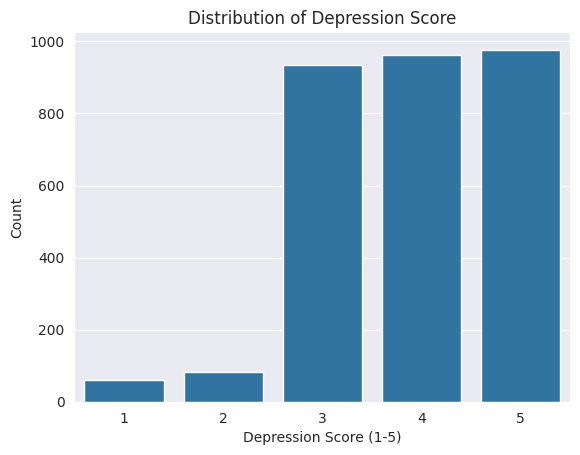

In [24]:
sns.countplot(x='depressed', data=df)
plt.title("Distribution of Depression Score")
plt.xlabel("Depression Score (1-5)")
plt.ylabel("Count")

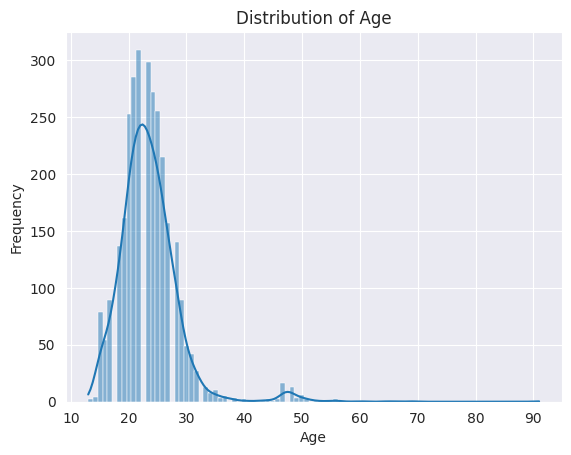

In [25]:

sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


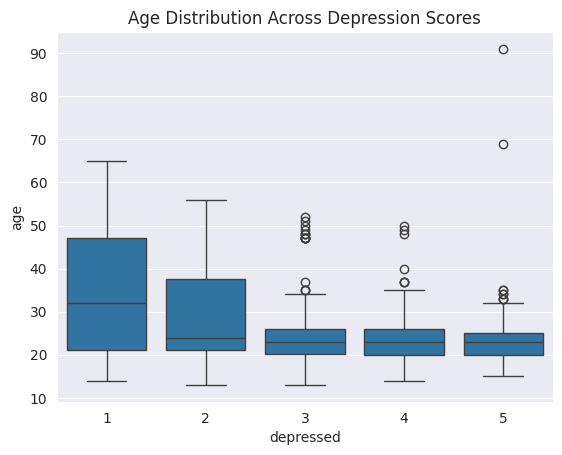

In [26]:
# Age vs Depression
sns.boxplot(x="depressed", y='age', data=df)
plt.title("Age Distribution Across Depression Scores")
plt.show()

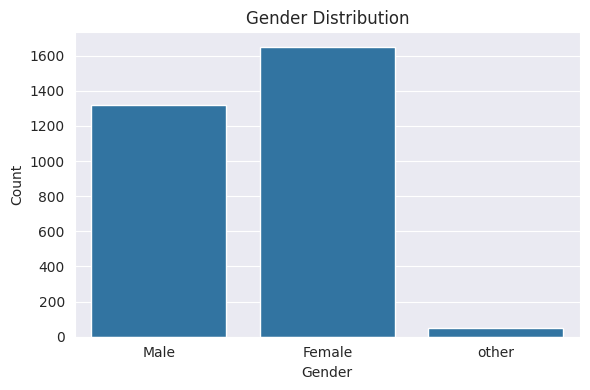

In [27]:
# Univariate: Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


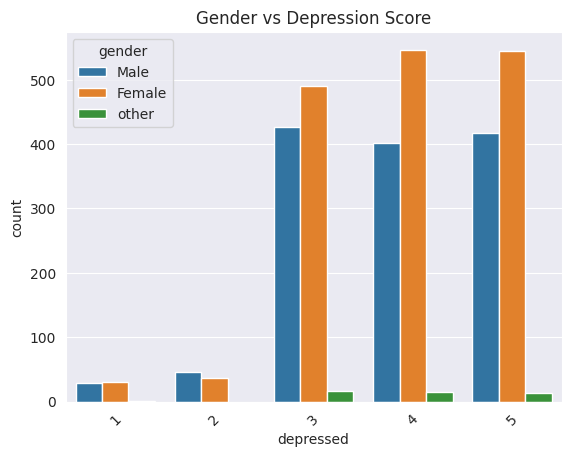

In [28]:
sns.countplot(x='depressed', hue='gender', data=df)
plt.title("Gender vs Depression Score")
plt.xticks(rotation=45)
plt.show()

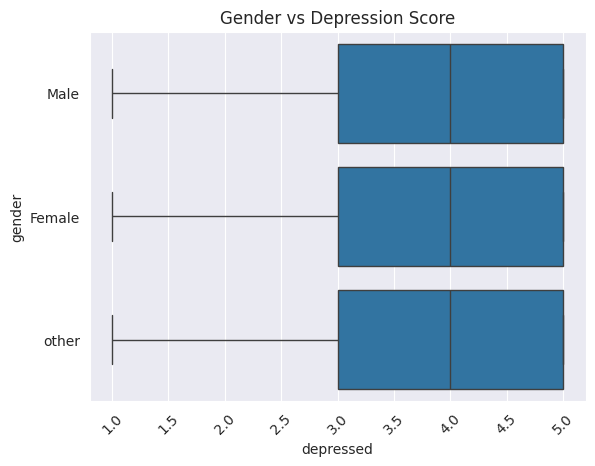

In [29]:
sns.boxplot(x='depressed', y='gender', data=df)
plt.title("Gender vs Depression Score")
plt.xticks(rotation=45)
plt.show()

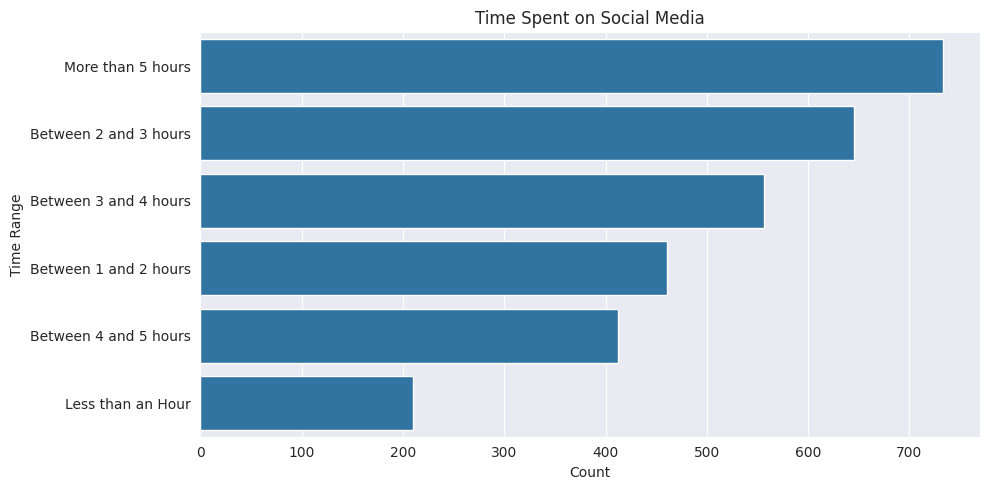

In [30]:
# Univariate: Social Media Time
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='avg_time_per_day', order=df['avg_time_per_day'].value_counts().index)
plt.title('Time Spent on Social Media')
plt.xlabel('Count')
plt.ylabel('Time Range')
plt.tight_layout()
plt.show()

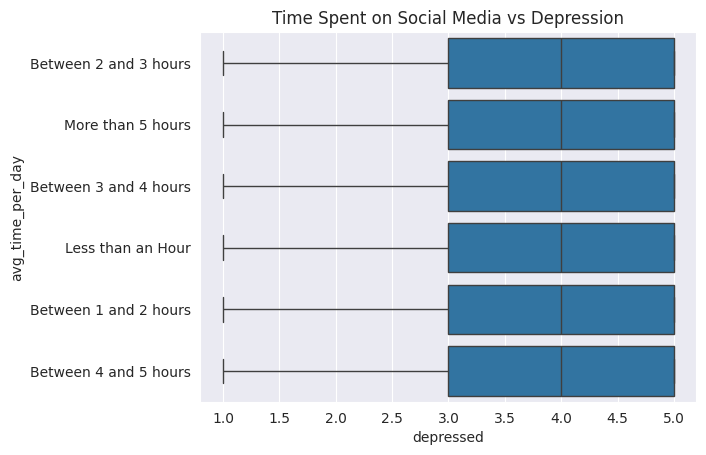

In [31]:
sns.boxplot(x='depressed', y="avg_time_per_day", data=df)
plt.title("Time Spent on Social Media vs Depression")

plt.show()

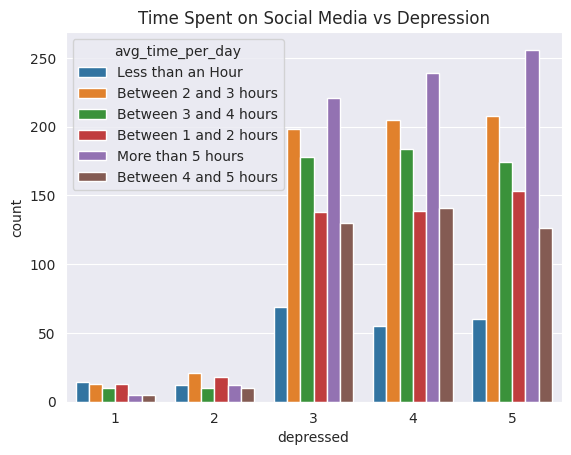

In [32]:
sns.countplot(x='depressed', hue="avg_time_per_day", data=df)
plt.title("Time Spent on Social Media vs Depression")

plt.show()

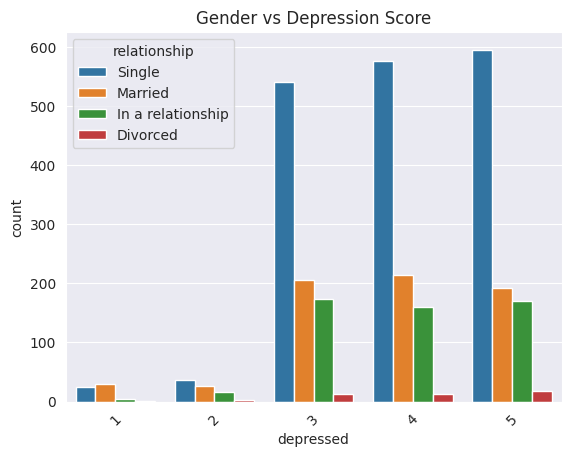

In [33]:
sns.countplot(x='depressed', hue='relationship', data=df)
plt.title("Gender vs Depression Score")
plt.xticks(rotation=45)
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     3017 non-null   float64
 1   gender                  3017 non-null   object 
 2   relationship            3017 non-null   object 
 3   occupation              3017 non-null   object 
 4   affiliate_organization  3017 non-null   object 
 5   social_media_use        3017 non-null   object 
 6   platforms               3017 non-null   object 
 7   avg_time_per_day        3017 non-null   object 
 8   without_purpose         3017 non-null   int64  
 9   distracted              3017 non-null   int64  
 10  restless                3017 non-null   int64  
 11  distracted_ease         3017 non-null   int64  
 12  worries                 3017 non-null   int64  
 13  concentration           3017 non-null   int64  
 14  compare_to_others       3017 non-null   

In [35]:
df.head()

,age,gender,relationship,occupation,affiliate_organization,social_media_use,platforms,avg_time_per_day,without_purpose,distracted,restless,distracted_ease,worries,concentration,compare_to_others,compare_feelings,validation,depressed,daily_activity_flux,sleeping_issues
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


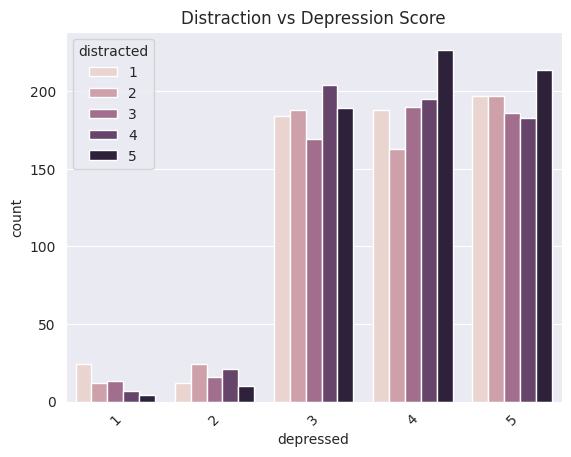

In [36]:
sns.countplot(x='depressed', hue='distracted', data=df)
plt.title("Distraction vs Depression Score")
plt.xticks(rotation=45)
plt.show()

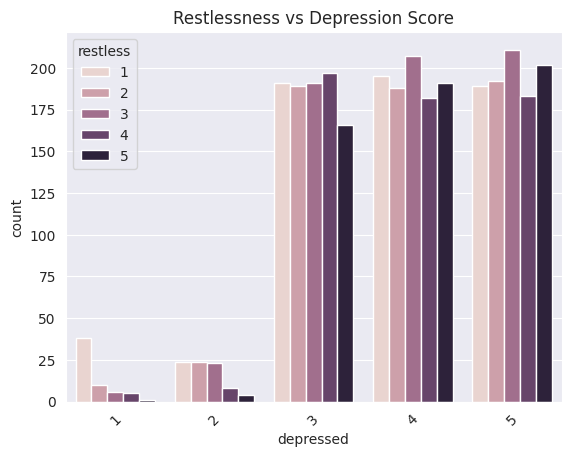

In [37]:
sns.countplot(x='depressed', hue='restless', data=df)
plt.title("Restlessness vs Depression Score")
plt.xticks(rotation=45)
plt.show()

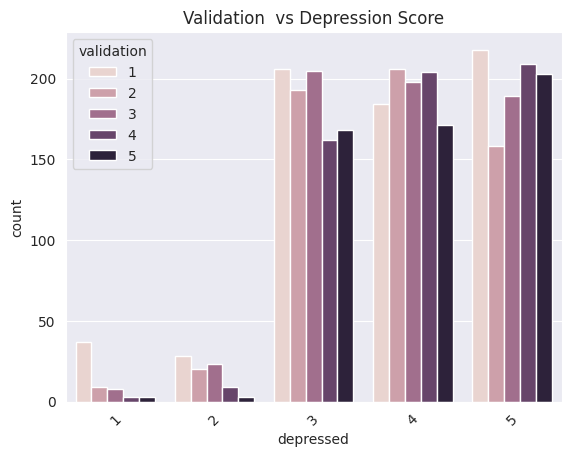

In [38]:
sns.countplot(x='depressed', hue='validation', data=df)
plt.title("Validation  vs Depression Score")
plt.xticks(rotation=45)
plt.show()

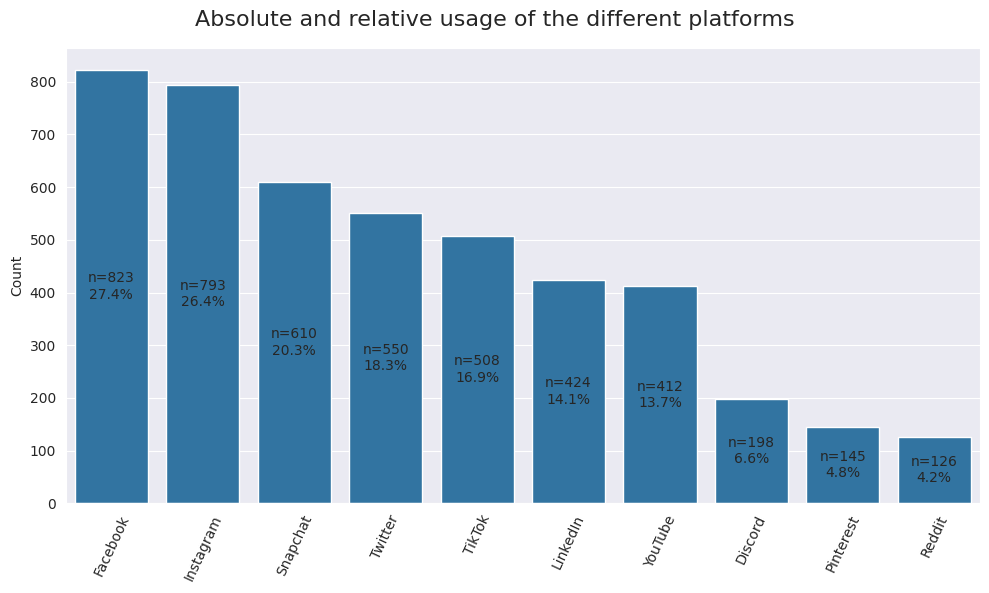

In [40]:
#getting the number of people saying, they are using social media
maxval = df[df.social_media_use == 'Yes'].iloc[:,0].count()

#make the plot
fig, ax = plt.subplots(figsize=(10,6))
# Calculate the value counts of platforms and convert it to a DataFrame
platform_counts = df.platforms.str.split(', ', expand=True).stack().value_counts().reset_index()
platform_counts.columns = ['Platform', 'Count']  # Rename columns for clarity

# Use the DataFrame in sns.barplot
sns.barplot(data=platform_counts, x='Platform', y='Count', ax=ax)

fig.suptitle("Absolute and relative usage of the different platforms", fontsize=16)
ax.set_xlabel("")
ax.set_ylabel("Count")
ax.tick_params(axis='x', rotation=65)

for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h / 2)
    percent = (h/maxval)*100
    ax.annotate(text=f'n={h:0.0f}\n{percent:0.1f}%', xy=xy, ha='center', va='center')

plt.tight_layout();

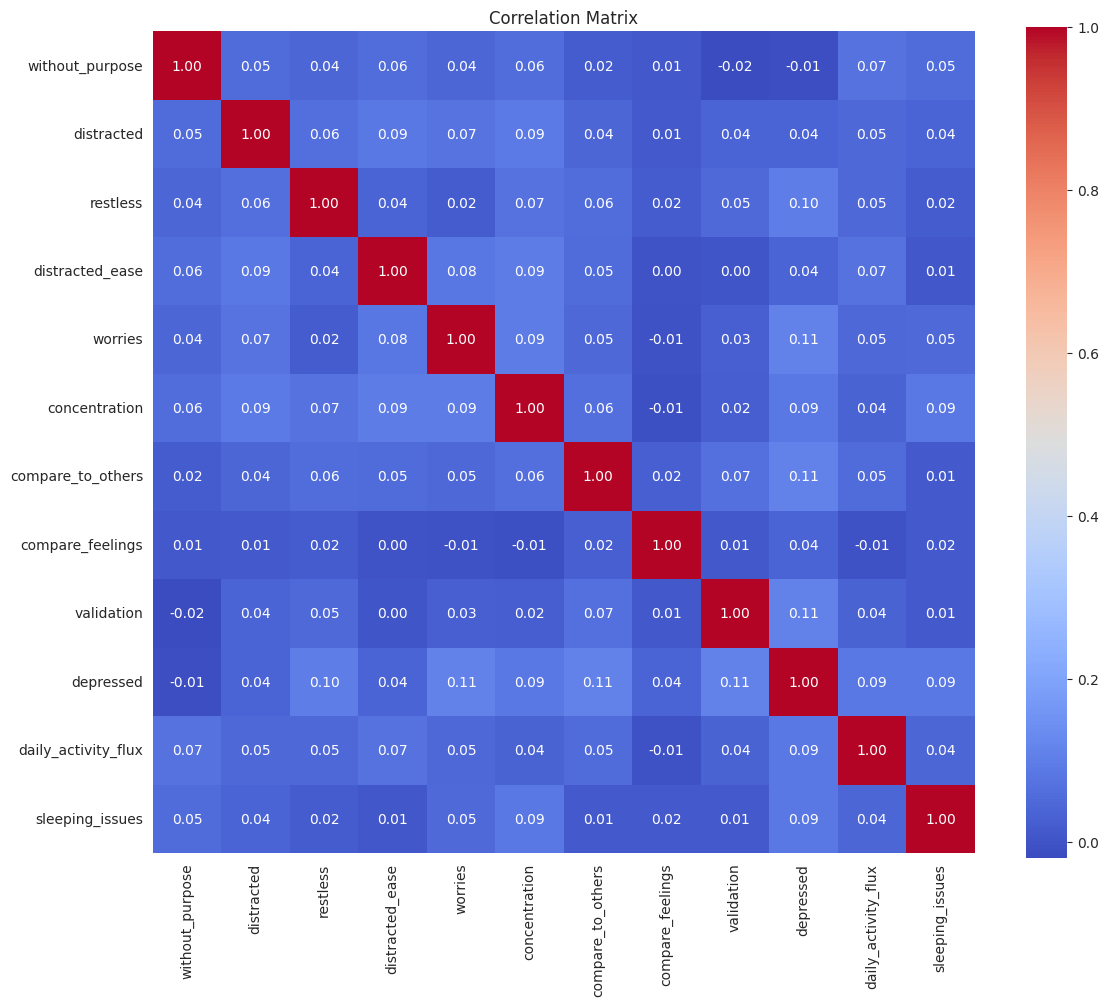

In [41]:
# Multivariate: Correlation Matrix
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['age']).columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

<a id='conclusions'></a>
## **Conclusion**

# Exploratory Data Analysis (EDA): Social Media and Mental Health

This exploratory data analysis (EDA) provided meaningful insights into the psychological effects of social media usage among youths and young professionals. The dataset, collected through a structured survey, enabled us to investigate various behavioral, emotional, and demographic factors that may contribute to depressive symptoms.

---

## **Key Findings**

### 📱 High Usage, High Risk  
A large proportion of respondents reported spending more than 3 hours daily on social media. A positive association was observed between longer daily usage and elevated depression scores, reinforcing concerns that excessive screen time may adversely affect mental well-being.

### 🚺 Gender Disparities  
Female respondents generally reported higher levels of social comparison, validation-seeking, and depressive symptoms compared to males, echoing global studies that show women are more vulnerable to the emotional impacts of social media.

### 🔄 Self-Comparison and Depression  
Frequent self-comparison on social media strongly correlated with higher levels of feeling down or depressed. Respondents who often compare themselves to others online were more likely to experience emotional distress and low self-worth.

### 😣 Restlessness and Distraction  
Many participants indicated difficulty focusing and experiencing restlessness when unable to access social media. These behaviors also aligned closely with increased depression scores, suggesting that dependency on online engagement may impair emotional regulation and cognitive clarity.

### ✅ Validation-Seeking Behavior  
Users who scored higher on validation-seeking (e.g., checking likes or seeking comments) also exhibited elevated signs of depressive tendencies. This reinforces the hypothesis that external validation through social media can influence mental stability.

### 🔗 Interaction Effects  
Multivariate analyses revealed that being single, spending over 3 hours daily online, and having high self-comparison frequency formed a potent combination significantly associated with increased depressive symptoms.

---

## **Implications**

These findings underscore the urgent need for:

- 🧠 Mental health awareness campaigns tailored for social media users  
- 💻 Digital literacy programs that help youths manage time spent online  
- ⚖️ Interventions targeting validation-seeking and comparison behaviors  
- 🏫 Policy frameworks in educational and workplace institutions to support digital wellness

---

## **Limitations**

- The study is based on self-reported data, which may be subject to bias  
- It is cross-sectional, so causality cannot be established  
- Depression scores are not clinically diagnosed, so results should be interpreted cautiously  

---

## **Future Work**

Further research using **longitudinal data** and incorporating **clinical mental health evaluations** would offer deeper insights. Integrating physiological data, such as **sleep trackers** or **screen-time logs**, could also enhance the robustness of findings.


In [42]:
df.to_csv("social_media_data_for_model.csv")